In [1]:
from google.colab import drive
drive.mount('./contents')

Mounted at ./contents


In [2]:
cd contents/MyDrive/working/yolov5

/content/contents/MyDrive/working/yolov5


# 버전 맞추기

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


# img 파일

In [ ]:
import glob

train_img_list = glob.glob('xray/train/images/*.jpg')
val_img_list = glob.glob('xray/valid/images/*.jpg')
test_img_list = glob.glob('xray/test/images/*.jpg')

len(train_img_list), len(val_img_list), len(test_img_list)

(320, 80, 15)

In [ ]:
import yaml

with open('xray/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
with open('xray/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')
with open('xray/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

# 파일의 글 쓰기

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def write_template(file, txts):
    with open(file, 'w') as f:
        f.write(txts.format(**globals()))

In [ ]:
ls xray

etc/  test/  test.txt  train/  train.txt  valid/  val.txt


In [ ]:
%%write_template xray/data.yaml

train: ./xray/train/images
val: ./xray/valid/images
test: ./xray/test/images

nc: 1
names: ['xray']

In [ ]:
!cat xray/data.yaml


train: ./xray/train/images
val: ./xray/valid/images
test: ./xray/test/images

nc: 1
names: ['xray']


In [ ]:
import yaml

with open('./xray/data.yaml', 'r') as f:
    num_cls = str(yaml.safe_load(f)['nc'])
    # num_cls -> nc: 1

!cat models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

# classess 입력

In [ ]:
%%write_template ./models/xray_yolov5s.yaml

# Parameters
nc: {num_cls}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
cat ./models/xray_yolov5s.yaml


# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [ ]:
ls xray models

models:
common.py            __init__.py         tf.py              yolov5m.yaml
custom_yolov5s.yaml  __pycache__/        xray_yolov5s.yaml  yolov5n.yaml
experimental.py      segment/            yolo.py            yolov5s.yaml
hub/                 smoke_yolov5s.yaml  yolov5l.yaml       yolov5x.yaml

xray:
data.yaml  etc/  test/  test.txt  train/  train.txt  valid/  val.txt


In [3]:
!python train.py --img 640 --batch 32 --epochs 50 \
--data ./xray/data.yaml --cfg ./models/xray_yolov5s.yaml \
--weight '' --name xray_results --cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 12.9 MB/s eta 0:00:00
2023-12-10 09:39:54.650830: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 09:39:54.650897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 09:39:54.650939: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirement ['gitpython'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 177.4 MB/s eta 0:00:00

requirements: AutoUpdate s

In [ ]:
# train: weights=, cfg=./models/xray_yolov5s.yaml, data=./xray/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml,
# epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False,
# noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False,
# optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=xray_results, exist_ok=False, quad=False, cos_lr=False,
# label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False,
# bbox_interval=-1, artifact_alias=latest

# 시각화 확인

In [4]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

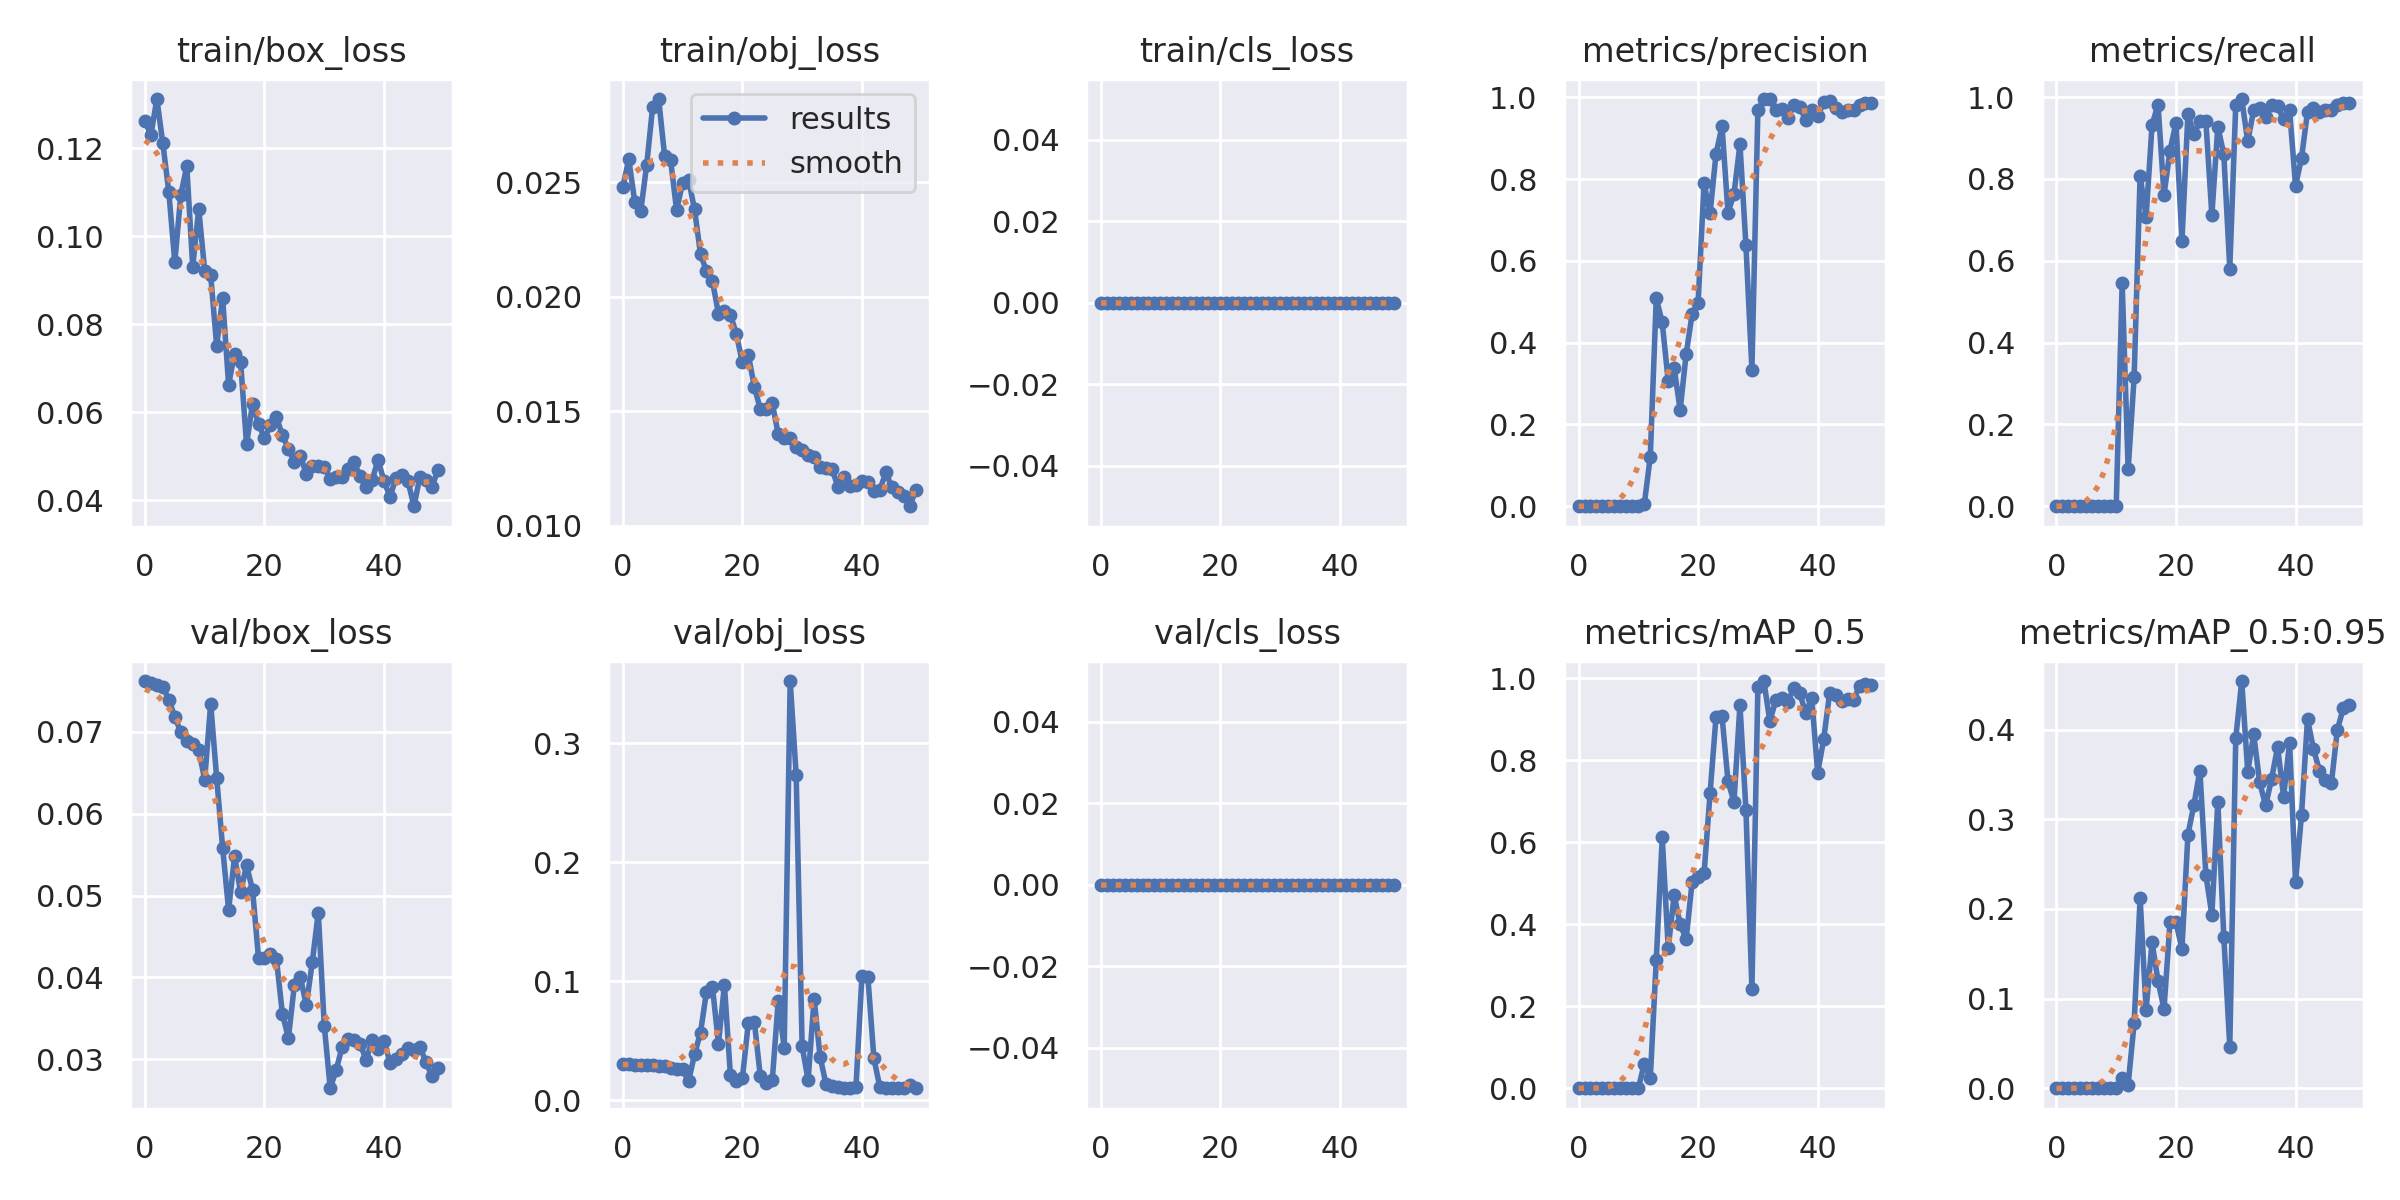

In [6]:
from IPython.display import Image
Image(filename='./runs/train/xray_results2/results.png', width=600)

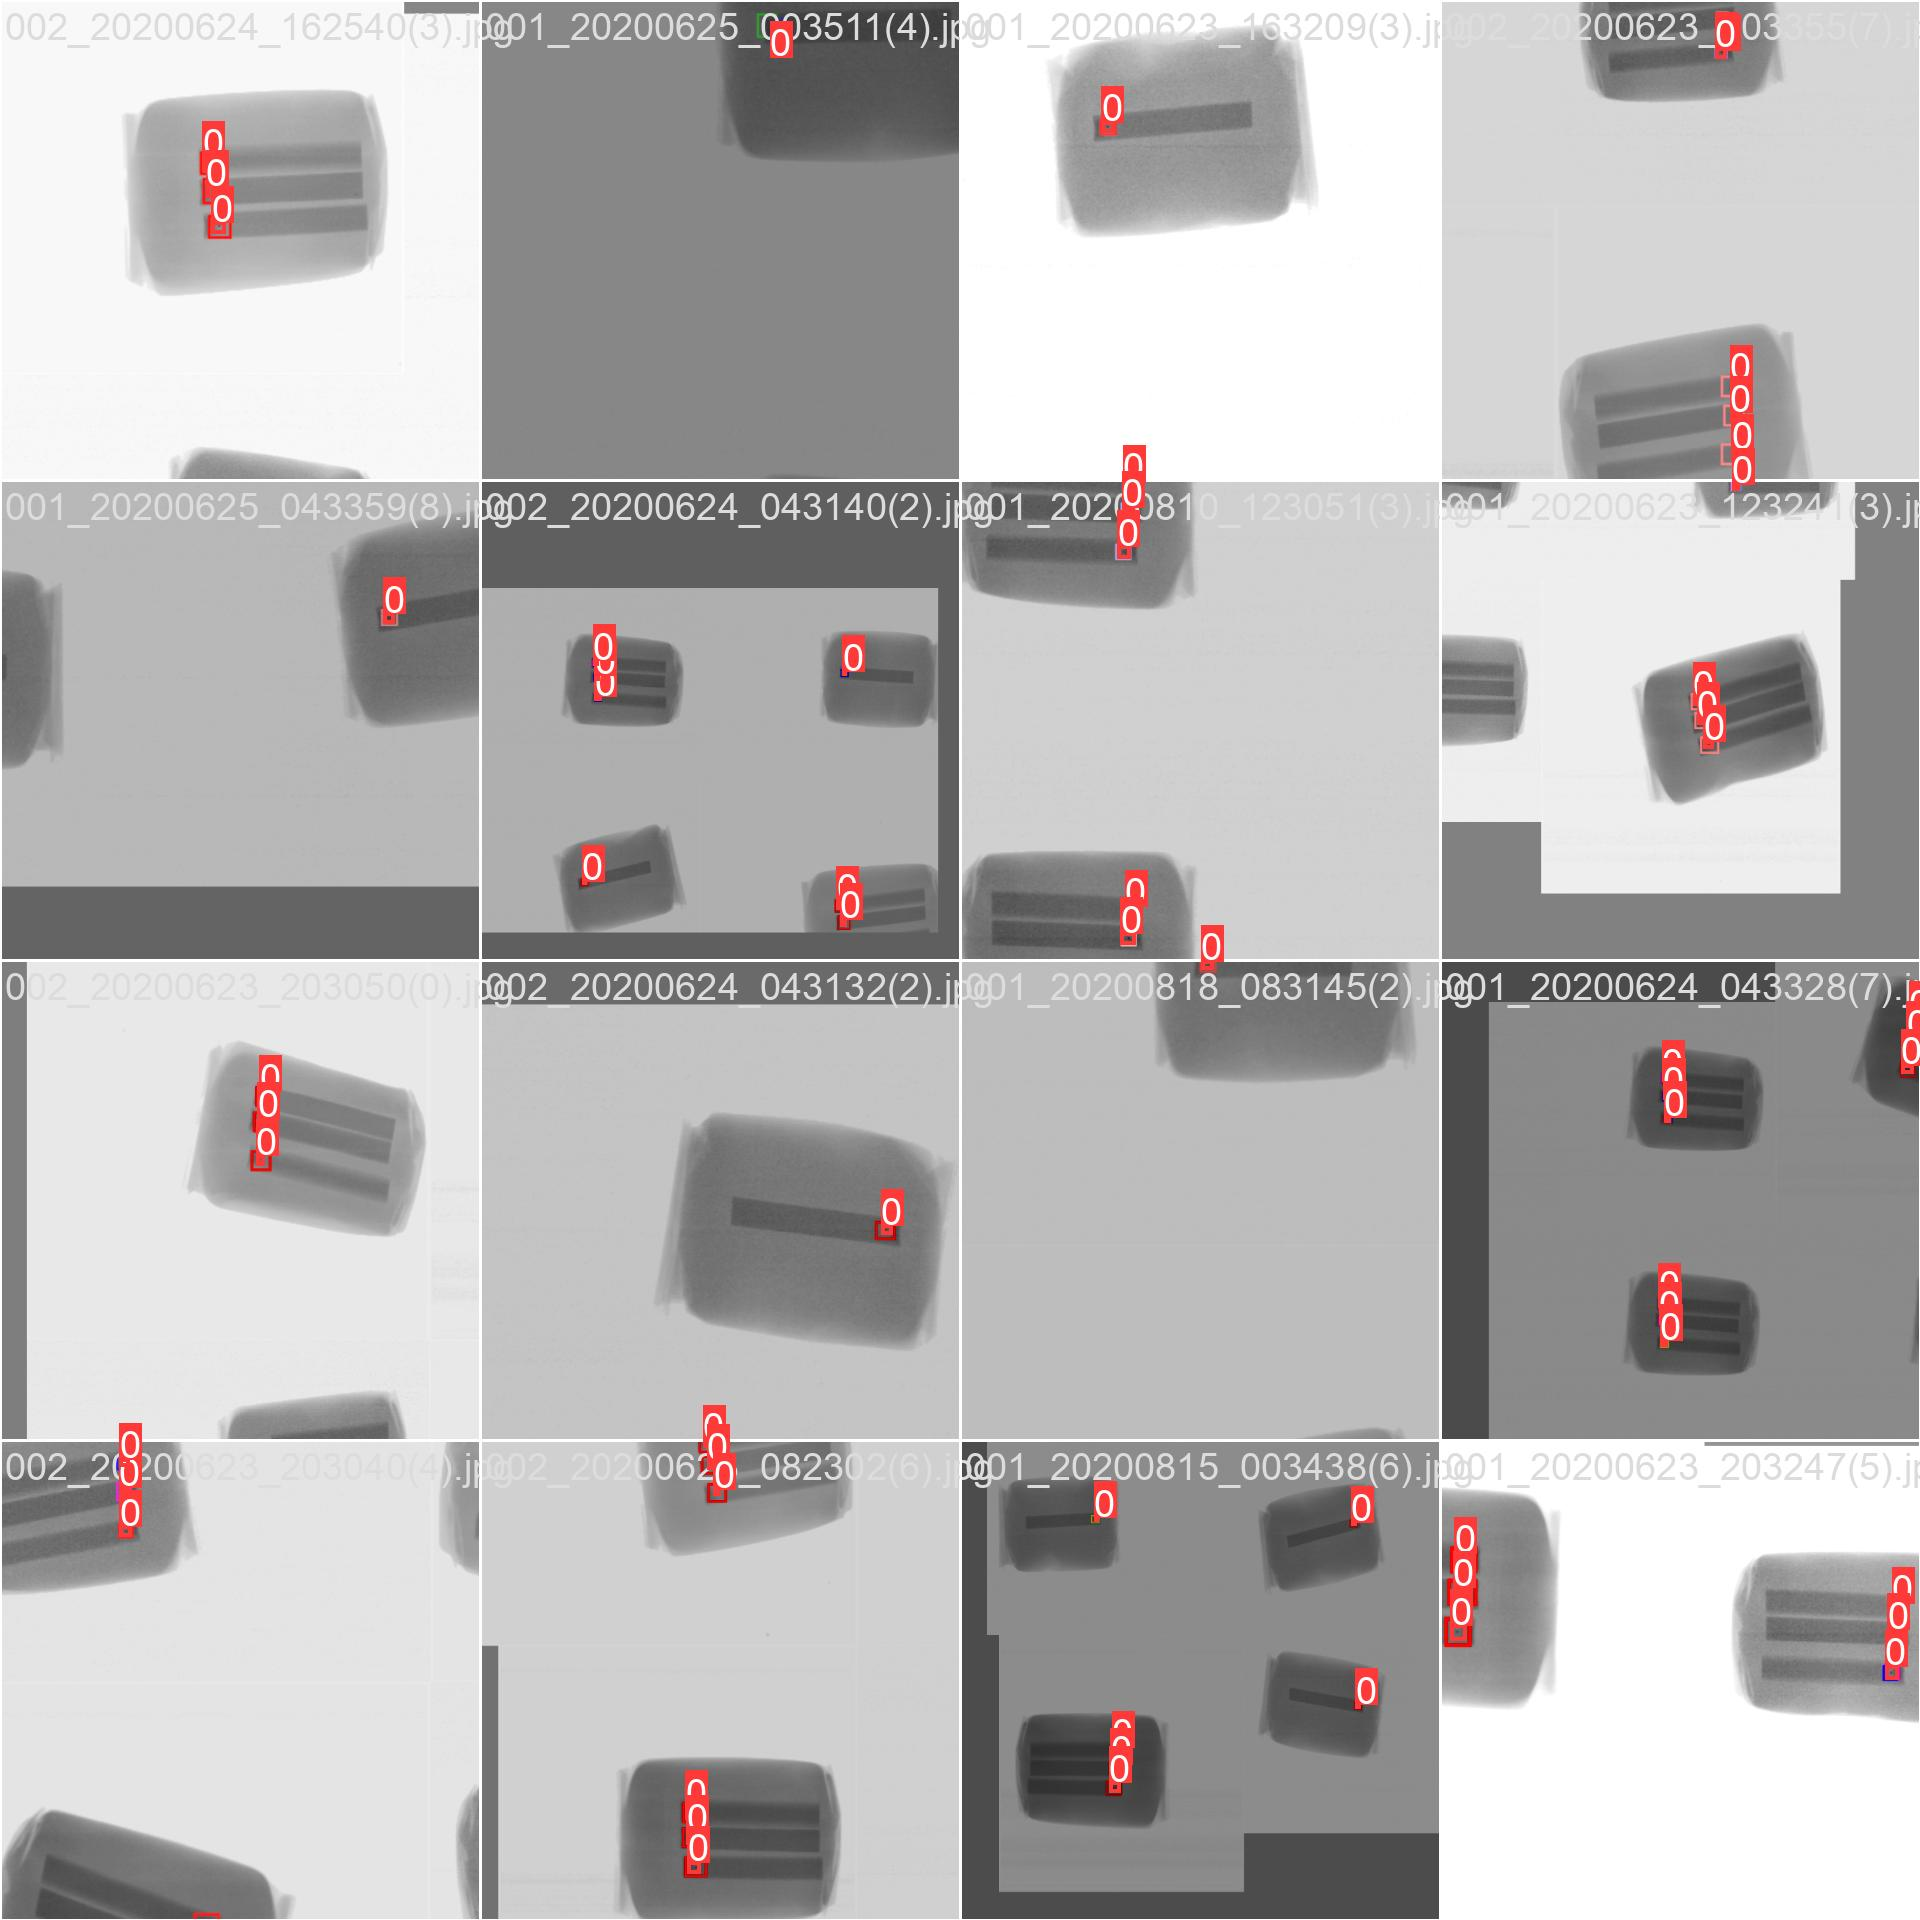

In [7]:
Image(filename='runs/train/xray_results2/train_batch0.jpg')

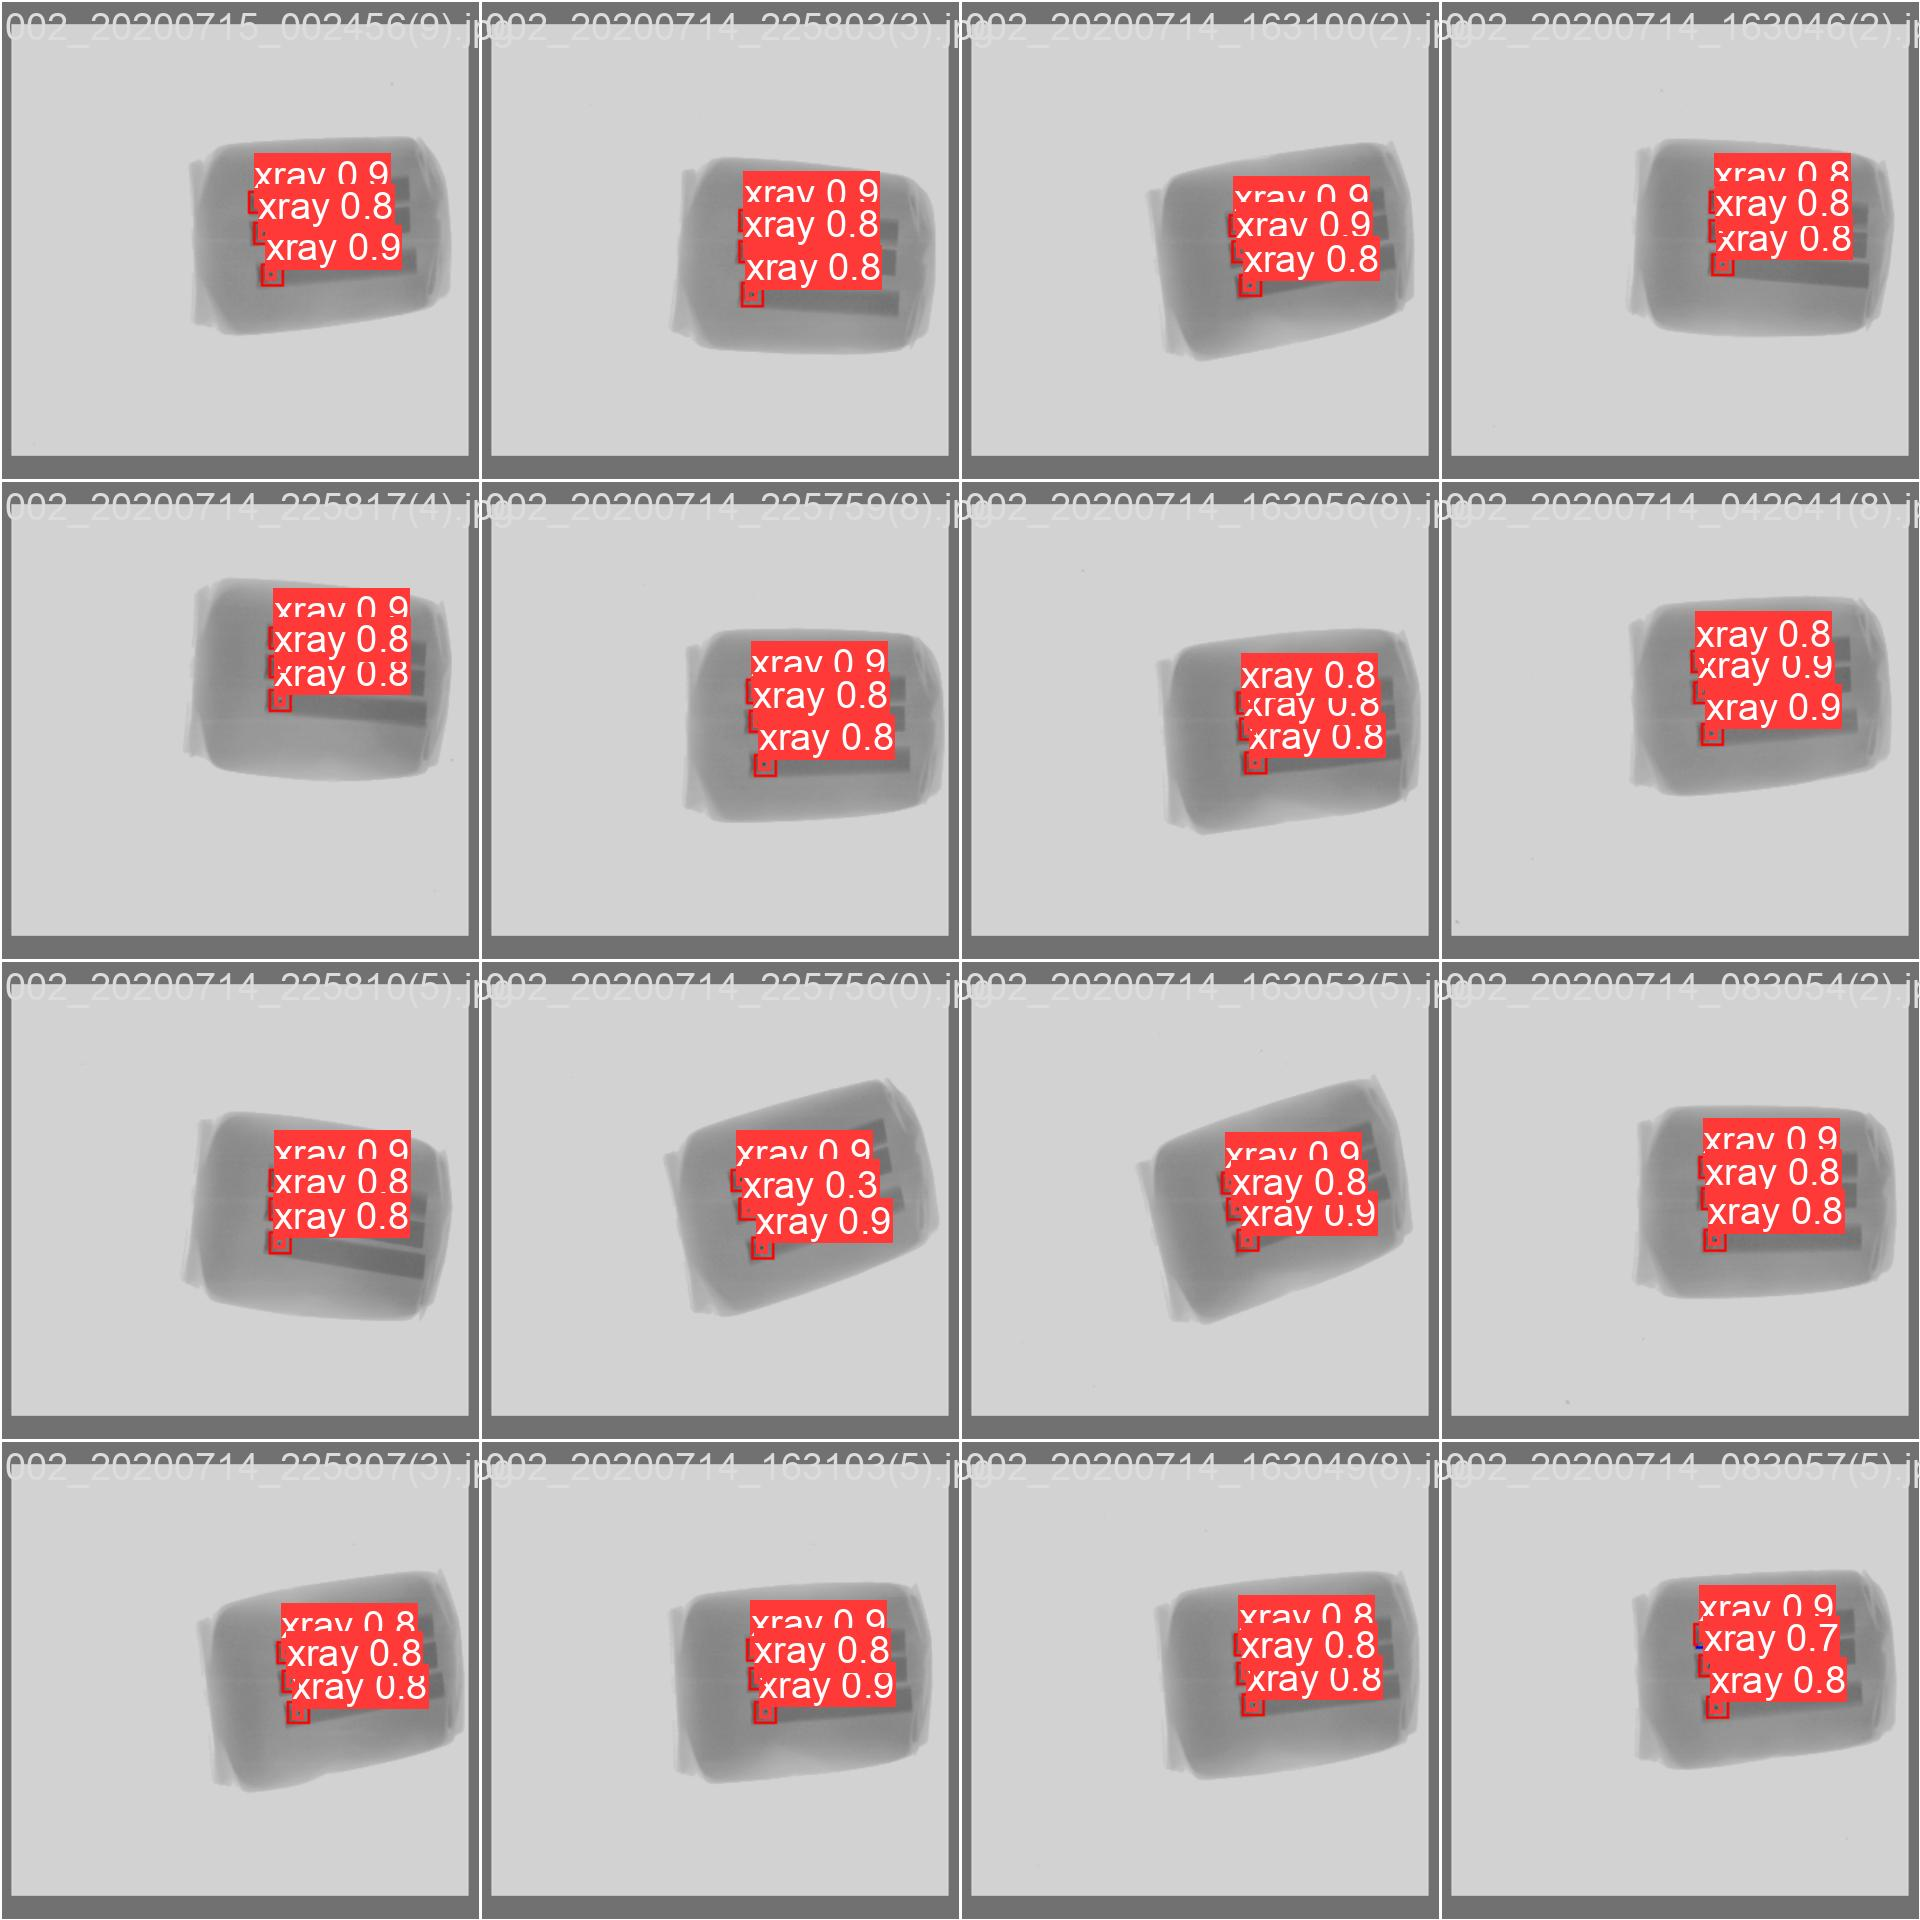

In [8]:
Image(filename='runs/train/xray_results2/val_batch0_pred.jpg')

# 성능 평가



In [ ]:
# --iou 0.65: IoU(Intersection over Union) 임계값을 설정합니다.
# 객체 탐지 모델의 성능을 평가할 때 사용되는 IoU 임계값을 설정하는 것입니다.
# --half: FP16 (half-precision floating-point) 사용 여부를 나타냅니다.
# FP16은 모델을 더 작은 메모리로 실행하여 속도를 향상시킬 수 있는 방법 중 하나입니다.

In [5]:
!python val.py --weight runs/train/xray_results2/weights/best.pt \
--data ./xray/data.yaml --img 640 --iou 0.65 --half

val: data=./xray/data.yaml, weights=['runs/train/xray_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
xray_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/contents/MyDrive/working/yolov5/xray/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100% 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.24s/it]
                   all         80        222      0.988      0.995      0.993      0.456
Speed: 0.6ms pre-process, 20.3ms inference, 11.2ms NMS per image at shape (32, 3, 640, 

In [ ]:
# --task test: 이는 모델을 테스트(test) 모드로 설정하는 것입니다.
# 모델을 테스트 모드로 설정하면 새로운 데이터셋에 대한 예측을 생성하고, 모델의 성능을 평가합니다.

In [9]:
!python val.py --weight runs/train/xray_results2/weights/best.pt \
--data ./xray/data.yaml --img 640 --task test

val: data=./xray/data.yaml, weights=['runs/train/xray_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
xray_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/contents/MyDrive/working/yolov5/xray/test/labels... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:27<00:00,  1.80s/it]
test: New cache created: /content/contents/MyDrive/working/yolov5/xray/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.50it/s]
                   all         15         23     0.0654     0.0435    0.00406    0.0

# 추론

In [ ]:

# detect: weights=['runs/train/xray_results2/weights/best.pt'], source=./xray/test/images, data=data/coco128.yaml,
# imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=,
# view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None,
# agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False,
# line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1


In [11]:
!python detect.py --weight runs/train/xray_results2/weights/best.pt \
--img 640 --conf 0.4 --source ./xray/test/images

detect: weights=['runs/train/xray_results2/weights/best.pt'], source=./xray/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
xray_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/contents/MyDrive/working/yolov5/xray/test/images/001_20200622_203312(6).jpg: 512x640 2 xrays, 46.4ms
image 2/15 /content/contents/MyDrive/working/yolov5/xray/test/images/001_20200623_003516(8).jpg: 512x640 3 xrays, 9.4ms
image 3/15 /content/contents/MyDrive/working/yolov5/xray/test/images/001_2

# 시각화

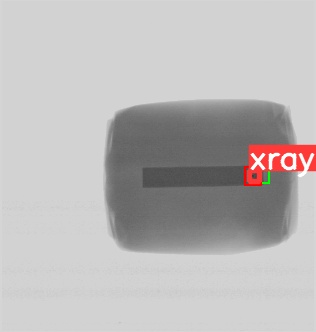

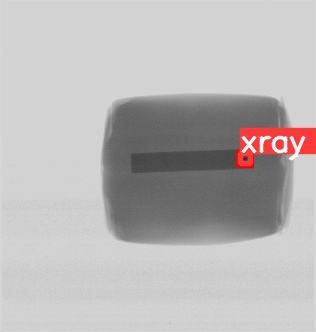

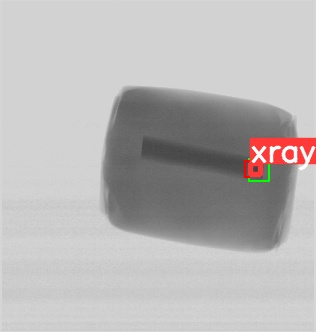

In [14]:
import glob
import random
from IPython.display import Image, display

loc_imgs=glob.glob('./runs/detect/exp3/*.jpg')

for _ in range(3):
    img = random.choice(loc_imgs)
    display(Image(filename=img, width=100))

# best 웨이트 옮기기

In [15]:
!mv runs/train/xray_results2/weights/best.pt xray